# Problem statement:--------------------------------------------------------------------------------------------------------

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.



Attributes inside the Avacado dataset
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [401]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [283]:
df=pd.read_csv("Avogadofruit.csv")

In [284]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [285]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [286]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [287]:
df = pd.read_csv("Avogadofruit.csv", parse_dates=['Date'])

In [288]:
 print (df['Date'].dtype)



 



datetime64[ns]


In [289]:
df['Date'] = pd.to_datetime(df['Date'])

 


For extracting year,month and day to new column,follow the code:

In [290]:




df['year'] = df['Date'].dt.year

df['month'] = df['Date'].dt.month

df['day'] = df['Date'].dt.day

In [291]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [292]:
df.drop(['Unnamed: 0'  ,'Date'] , axis=1,inplace=True)

In [293]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [294]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [295]:
#describe the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In Total bags,small bags,xlarge bags columns the difference between 75% and max is more so may be some outliers are present inside those columns

In [296]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

In [297]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
day               int64
dtype: object

Handelling the null value

In [298]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

In [400]:
df['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
0.52     1
1.50     1
0.51     1
1.53     1
1.46     1
Name: AveragePrice, Length: 113, dtype: int64

Observation -- This is label output where we do see price varioes a wider of range so we will go for linear regression 

# Data visualization


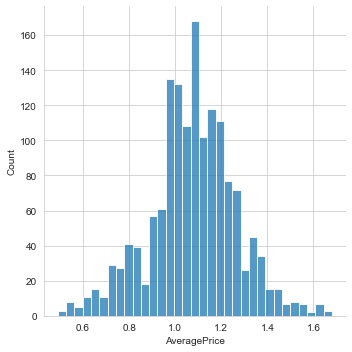

In [204]:
sns.displot(df['AveragePrice'])

Observation -- Data is normally distributed 

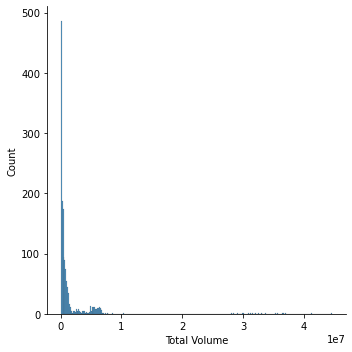

In [315]:
sns.displot(df['Total Volume'])

In [ ]:
Observation -- data is not normally distributed, we found right side skew semms to present here 

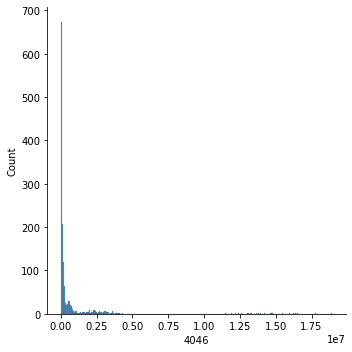

In [333]:
sns.displot(df['4046'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

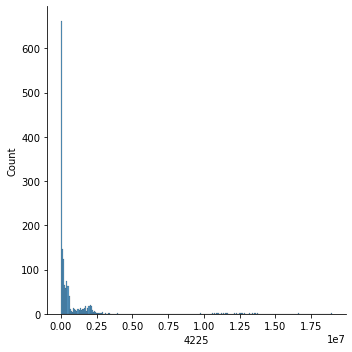

In [334]:
sns.displot(df['4225'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

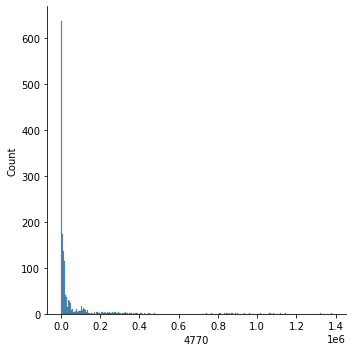

In [335]:
sns.displot(df['4770'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

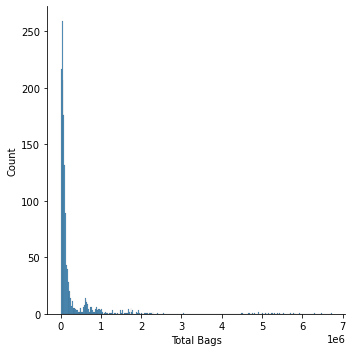

In [336]:
sns.displot(df['Total Bags'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

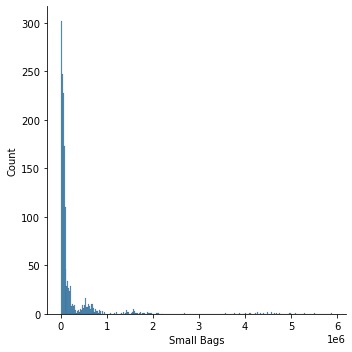

In [337]:
sns.displot(df['Small Bags'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

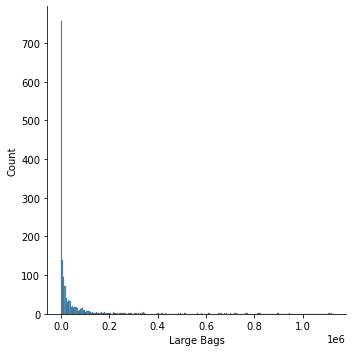

In [338]:
sns.displot(df['Large Bags'])

Observation -- data is not normally distributed, we found right side skew semms to present here 

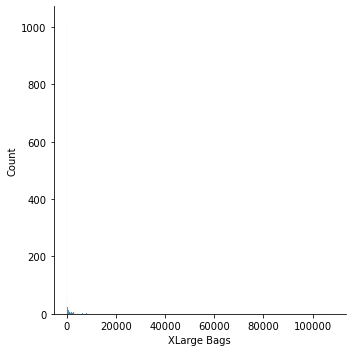

In [339]:
sns.displot(df['XLarge Bags'])

Observation -- data is not normally distributed.

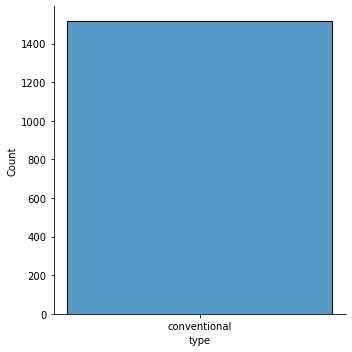

In [340]:
sns.displot(df['type'])

Observation -- Data is normally distributed but column it is having one value 

<AxesSubplot:xlabel='year', ylabel='count'>

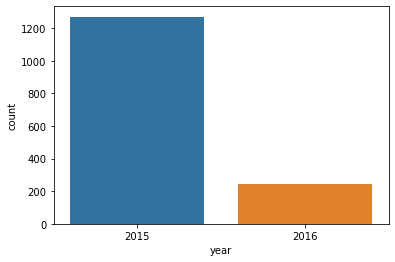

In [342]:
sns.countplot(df['year'])

Observation -- Here year is categorial variable where we foundthere is 2 type of category 2016 category  is having  heighest output

<AxesSubplot:xlabel='region', ylabel='count'>

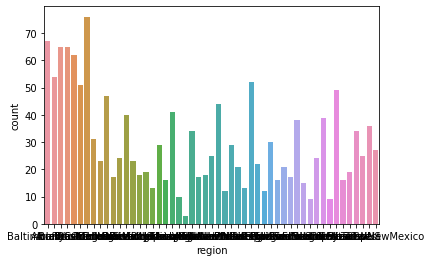

In [343]:
sns.countplot(df['region'])

Observation -- This is categorial column and we do see class imbalance issue

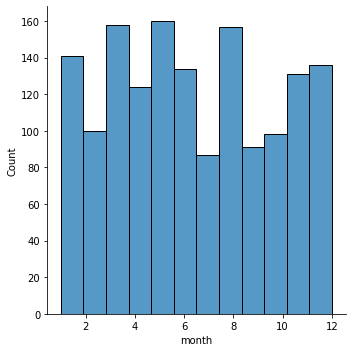

In [345]:
sns.displot(df['month'])

Observation -- We found  that  the data is normally distributed

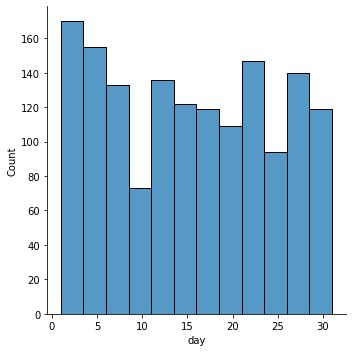

In [346]:
sns.displot(df['day'])

Observation -- We found here the data is not normally distributed

In [69]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [70]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [205]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


In [299]:
df['type']=le.fit_transform(df['type'])

In [300]:
df['region']=le.fit_transform(df['region'])

In [301]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,9,25


In [302]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [210]:
df['month'].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: month, dtype: int64

In [211]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

<AxesSubplot:xlabel='AveragePrice'>

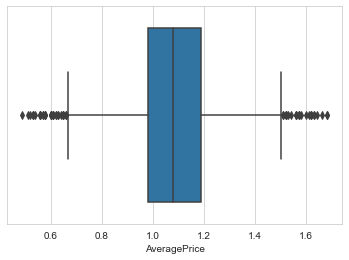

In [212]:
sns.boxplot(df['AveragePrice'])

In [ ]:
Observation--- We found taht datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='Total Volume'>

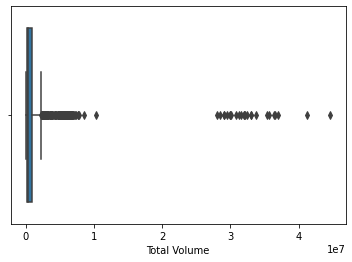

In [30]:
sns.boxplot(df['Total Volume'])

Observation--- We found taht datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='4046'>

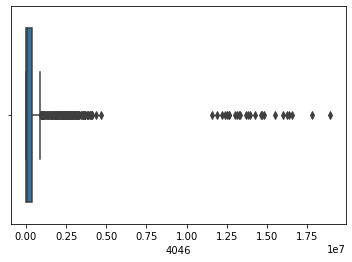

In [31]:
sns.boxplot(df['4046'])

Observation--- We found taht datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='4225'>

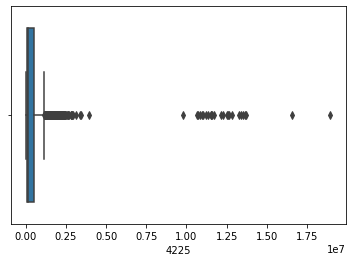

In [32]:
sns.boxplot(df['4225'])

Observation--- We found taht datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='4770'>

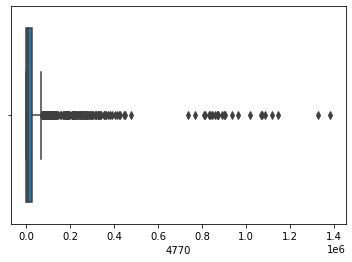

In [33]:
sns.boxplot(df['4770'])

Observation--- We found that datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='Total Bags'>

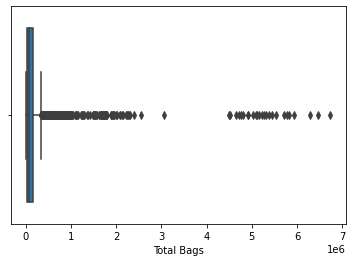

In [34]:
sns.boxplot(df['Total Bags'])

Observation--- We found that datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='Small Bags'>

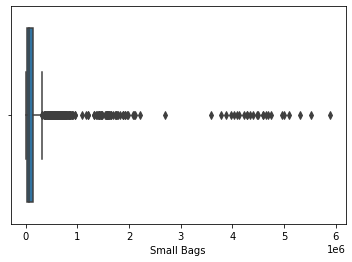

In [35]:
sns.boxplot(df['Small Bags'])

Observation--- We found that datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='Large Bags'>

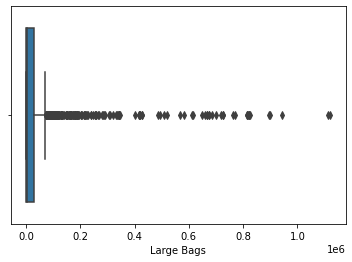

In [36]:
sns.boxplot(df['Large Bags'])

Observation--- We found that datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='XLarge Bags'>

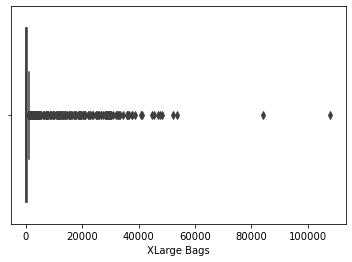

In [37]:
sns.boxplot(df['XLarge Bags'])

In [ ]:
Observation--- We found that datas are present above the vertices, so outlier present

<AxesSubplot:xlabel='type'>

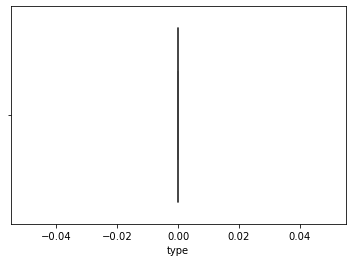

In [38]:
sns.boxplot(df['type'])

In [ ]:
Observation -- We found there is no outlier

<AxesSubplot:xlabel='year'>

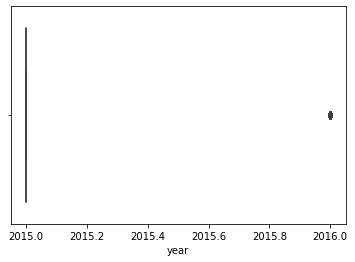

In [39]:
sns.boxplot(df['year'])

Observation -- We found outlier  present

<AxesSubplot:xlabel='region'>

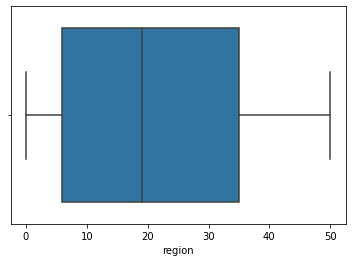

In [41]:
sns.boxplot(df['region'])

Observation-- we found that we found no outlier

<AxesSubplot:xlabel='month'>

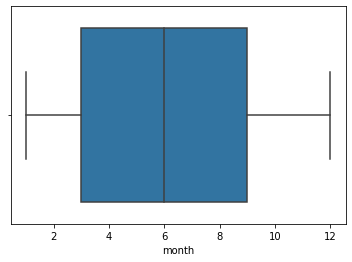

In [42]:
sns.boxplot(df['month'])


Observation-- we found that  no outlier

<AxesSubplot:xlabel='day'>

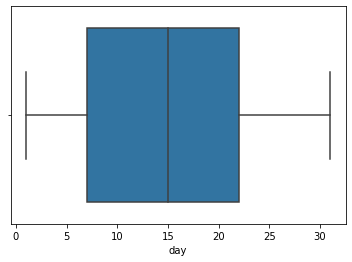

In [43]:
sns.boxplot(df['day'])


Observation-- we found that  no outlier

AveragePrice       AxesSubplot(0.125,0.536818;0.352273x0.343182)
Total Volume    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
4046                  AxesSubplot(0.125,0.125;0.352273x0.343182)
4225               AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

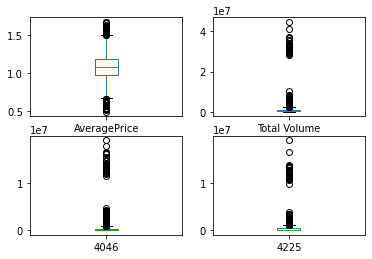

In [78]:
df.iloc[:,0:4].plot(kind='box' ,subplots=True  ,layout=(2,2))

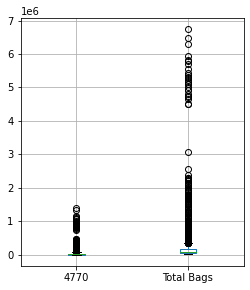

In [79]:
df.iloc[:,4:6].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

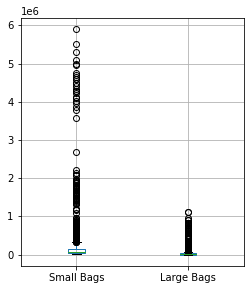

In [80]:
df.iloc[:,6:8].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

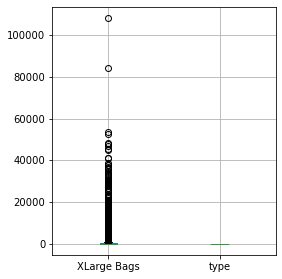

In [81]:
df.iloc[:,8:10].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

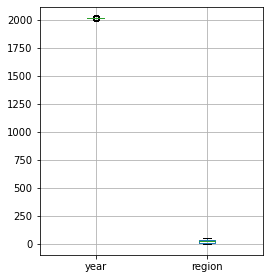

In [82]:
df.iloc[:,10:12].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

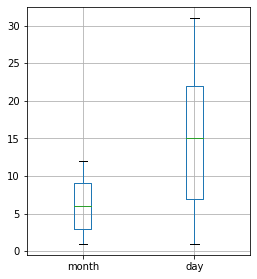

In [83]:
df.iloc[:,12:14].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

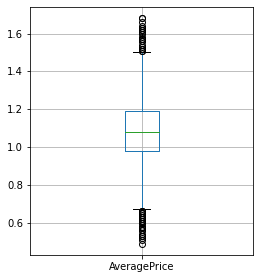

In [84]:
df.iloc[:,::14].boxplot(figsize=[4,4])
plt.subplots_adjust(bottom=0.02)

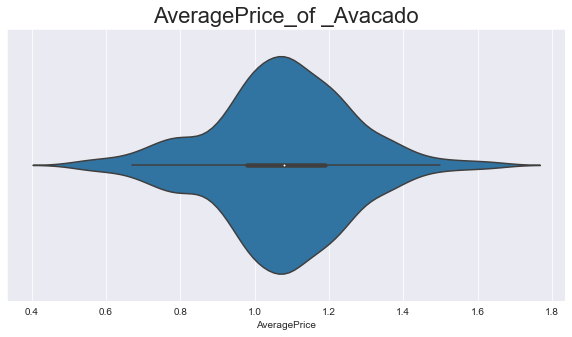

In [167]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.violinplot(df["AveragePrice"])
plt.title("AveragePrice_of _Avacado",{"fontsize":22})
plt.show()

most of the average price are coming between 1.0 to 1.2

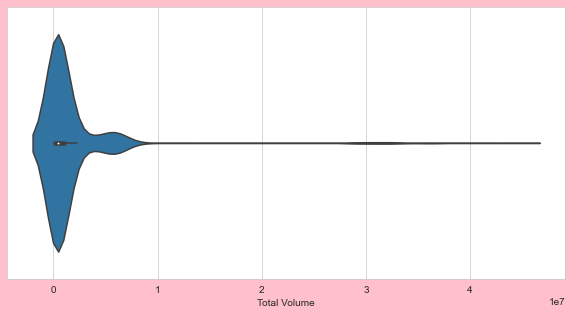

In [168]:
sns.set_style("whitegrid")
plt.figure(facecolor="pink",figsize=[10,5])
sns.violinplot(x="Total Volume",data=df)
plt.show()

 most total volumes are below 1

<AxesSubplot:xlabel='XLarge Bags'>

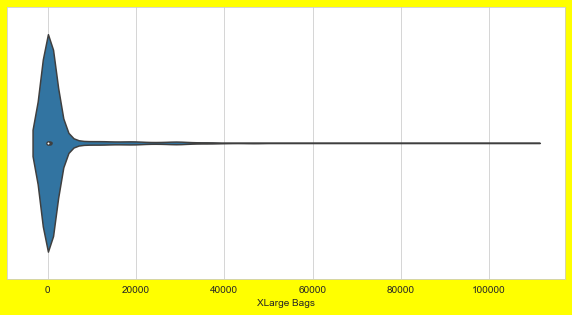

In [170]:
sns.set_style("whitegrid")
plt.figure(facecolor="yellow",figsize=[10,5])
sns.violinplot(x="XLarge Bags",data=df)

 most XLarge Bag  density coming @ 0

<AxesSubplot:xlabel='Large Bags'>

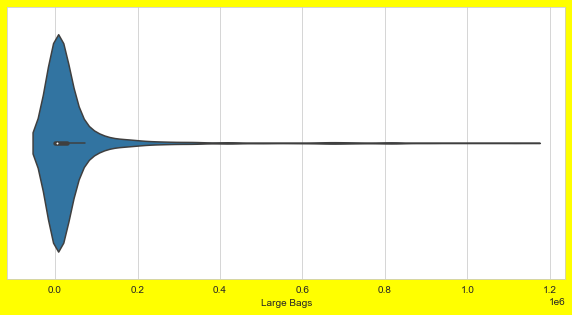

In [171]:
sns.set_style("whitegrid")
plt.figure(facecolor="yellow",figsize=[10,5])
sns.violinplot(x="Large Bags",data=df)

 most Large Bag  density coming @ 0

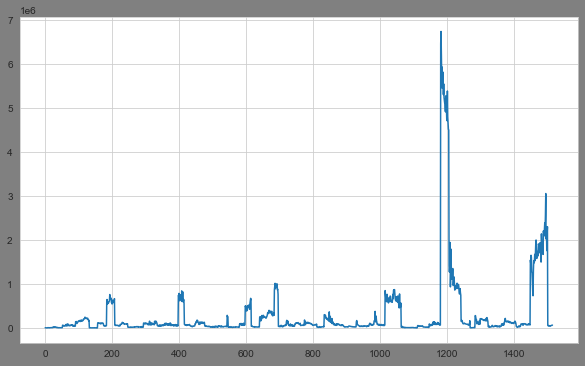

In [173]:
plt.figure(facecolor="grey",figsize=[10,6])
df['Total Bags'].plot.line()
plt.show()

In [ ]:
row#1190 have more no of total bags

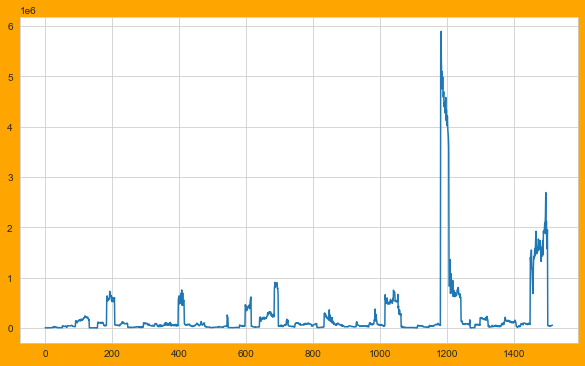

In [174]:
plt.figure(facecolor="orange",figsize=[10,6])
df['Small Bags'].plot.line()
plt.show()

ko→ row#1190 have more no of small bags



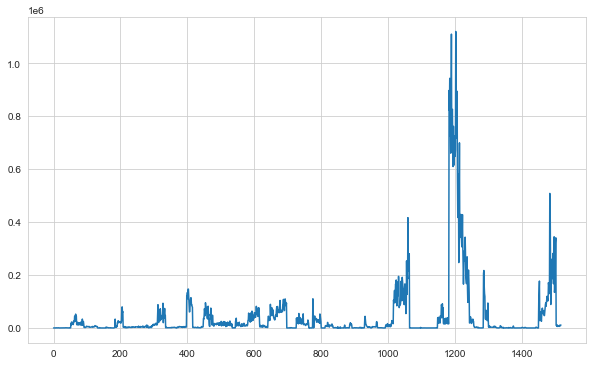

In [175]:
plt.figure(figsize=[10,6])
df['Large Bags'].plot.line()
plt.show()

ko→ row#1200 have more no of Large bags



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0,

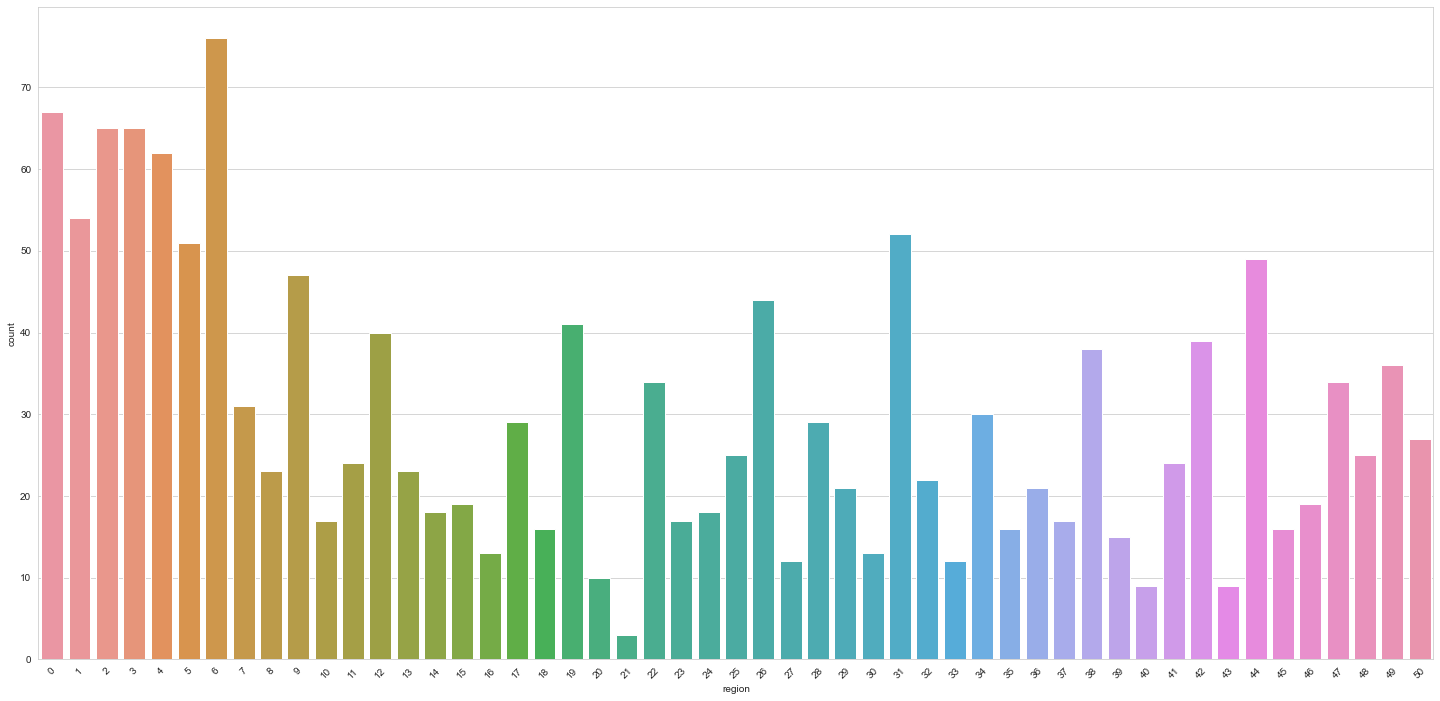

In [176]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)

In [307]:
dfcor=df.corr()

In [308]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144,0.021452,0.019315
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation -- we found that type  the whole column is having only one value which dont contribute much to the column , so we will be dropping it to next  step

In [309]:
df.drop(('type'),axis=1,inplace=True)

In [310]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25


we droppoed  type column as there is only 1 type of value

<AxesSubplot:>

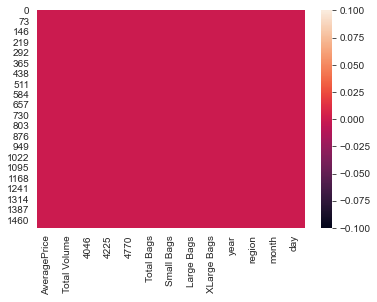

In [311]:
sns.heatmap(df.isnull())

Observation -- We found no null  value if df,after seen the above plot we can say there is no null value are present, If there were any ,we would've noticed in figure represented by different colour shade

<AxesSubplot:>

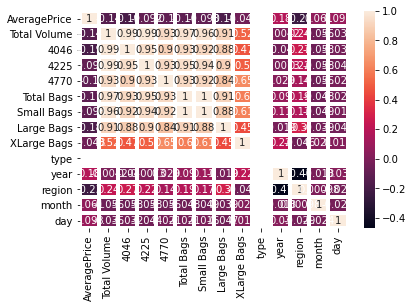

In [90]:
sns.heatmap(dfcor, annot=True, linewidth=3)

<AxesSubplot:>

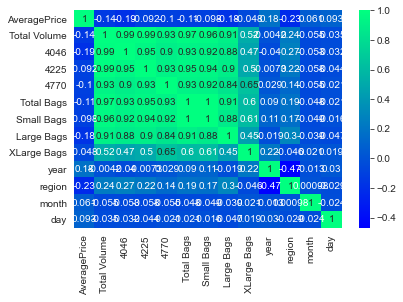

In [164]:
sns.heatmap(df.corr(),annot=True,cmap="winter")

O--->all columns are highly correlated to each other  where the value is 1 



Mathematically we will be calculating relationship and tried to plot usiong scatterplot ( there will be no stripplota s there is no categorial value)

In [312]:
dfcor['AveragePrice'].sort_values(ascending= False)

AveragePrice    1.000000
year            0.178683
day             0.092589
month           0.060642
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
type                 NaN
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

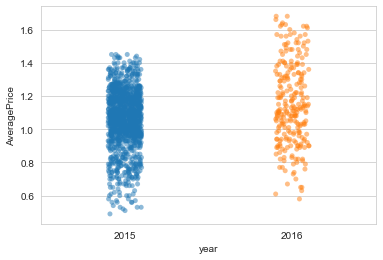

In [218]:
sns.stripplot(   x='year', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are having positive relation but not much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='day', ylabel='AveragePrice'>

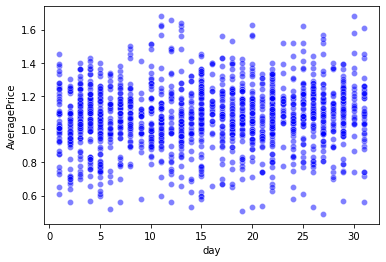

In [55]:
sns.scatterplot(   x='day', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are having positive relation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

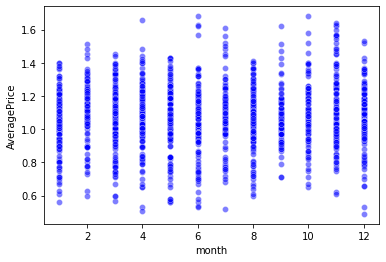

In [56]:
sns.scatterplot(   x='month', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are having positive relation but no much highly correlated

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

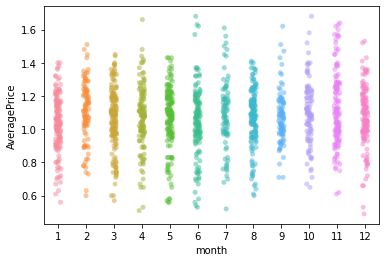

In [29]:
sns.stripplot(   x='month', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are having positive relation but no much highly correlated

# Negative Correlation plotting that which features  having negative correlation with label(output) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

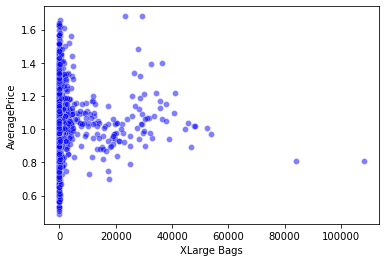

In [30]:
sns.scatterplot(   x='XLarge Bags', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

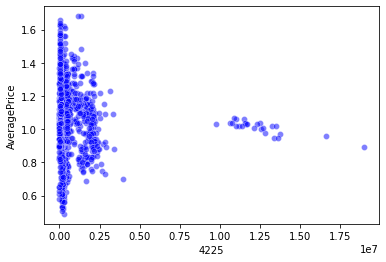

In [31]:
sns.scatterplot(   x='4225', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

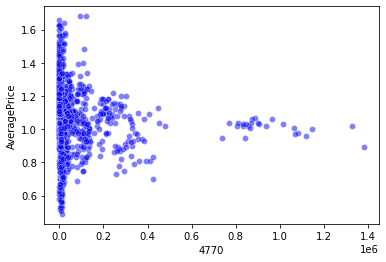

In [32]:
sns.scatterplot(   x='4770', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

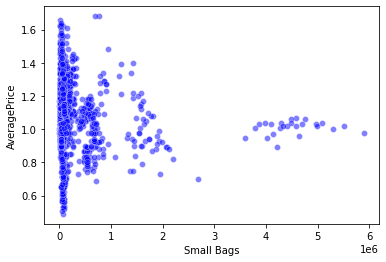

In [33]:
sns.scatterplot(   x='Small Bags', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [ ]:
Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

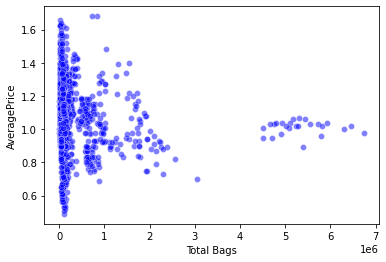

In [34]:
sns.scatterplot(   x='Total Bags', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [ ]:
Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

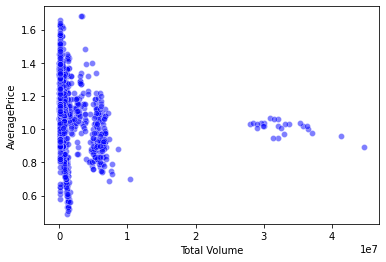

In [35]:
sns.scatterplot(   x='Total Volume', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [ ]:
Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

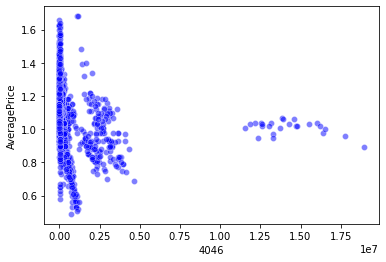

In [36]:
sns.scatterplot(   x='4046', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [ ]:
Observation -- We found that both are negative   correlation but no much highly correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

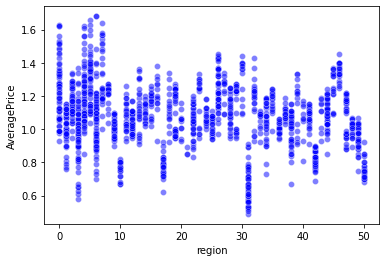

In [37]:
sns.scatterplot(   x='region', y='AveragePrice',alpha=0.5 , c=(0,0,1),edgecolors='r', data=df)

In [ ]:
Observation -- We found that both are negative   correlation but no much highly correlated

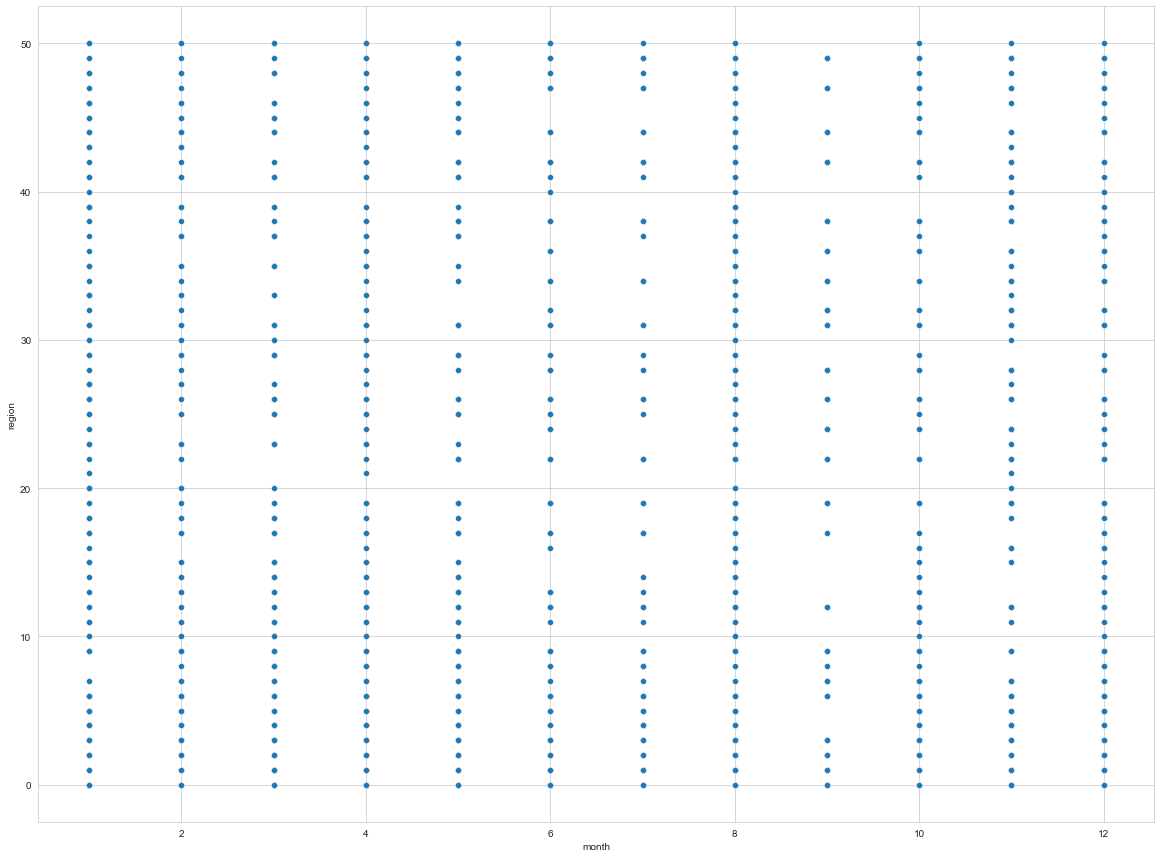

In [183]:
plt.figure(figsize=[20,15])
sns.scatterplot(x="month",y="region",data=df)
plt.show()

o → sales of each month respect to region

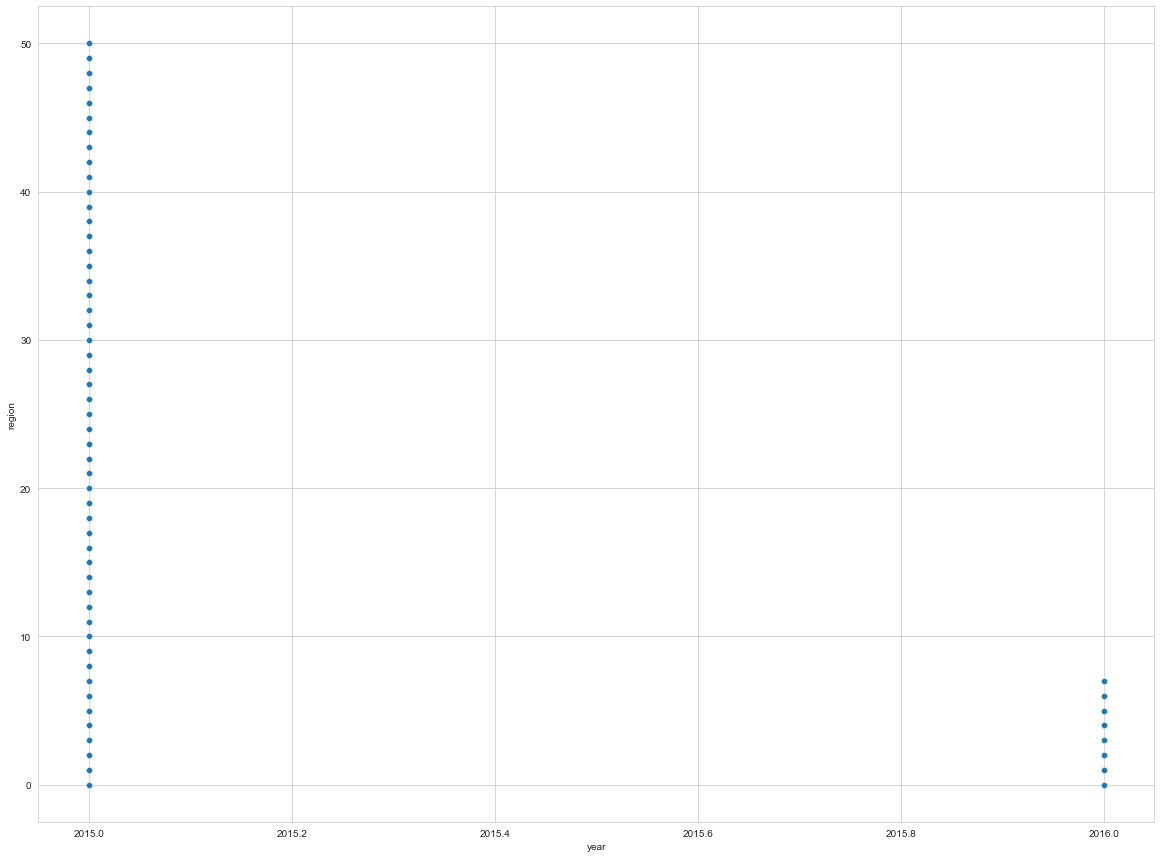

In [184]:
plt.figure(figsize=[20,15])
sns.scatterplot(x="year",y="region",data=df)
plt.show()


o → sales of each year respect to region

Text(0.5, 1.0, 'region wise average price')

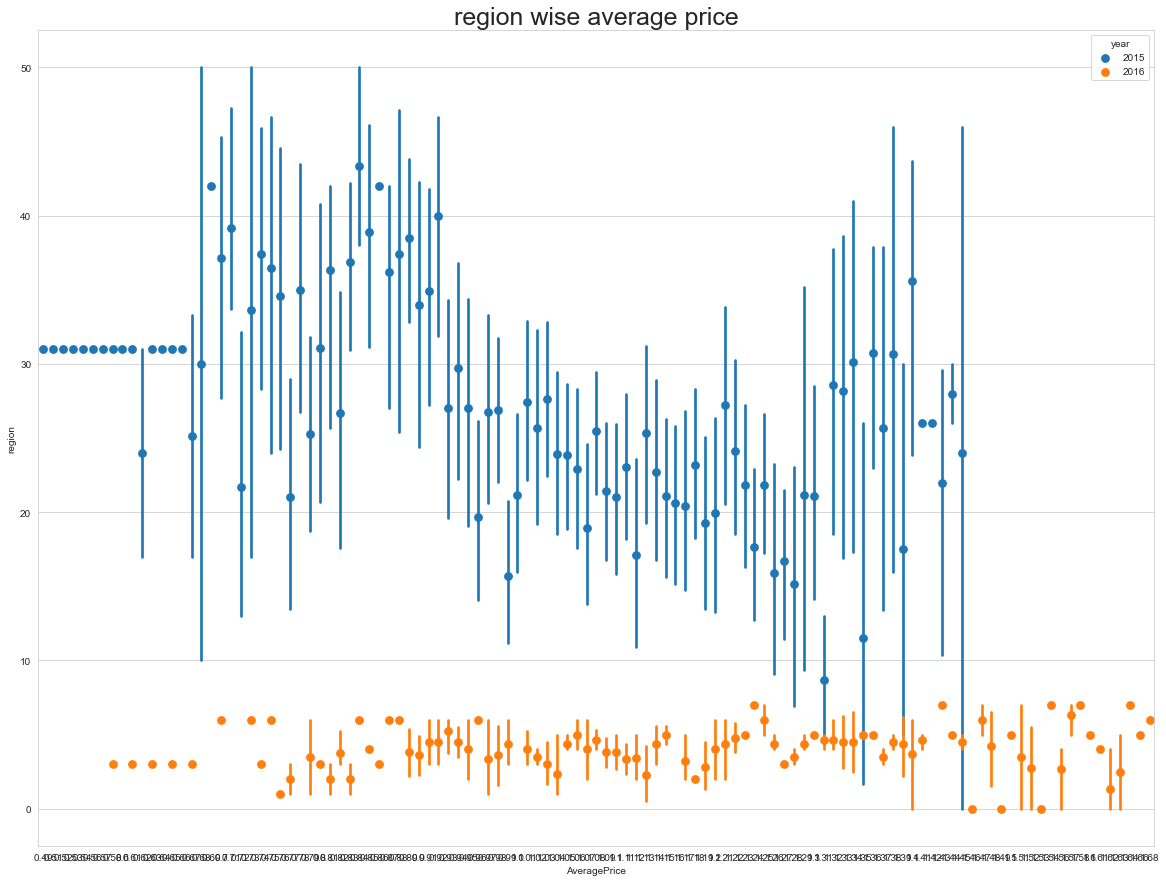

In [152]:
sns.set_style("whitegrid")
plt.figure(figsize=[20,15])
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year', join=False)
plt.title('region wise average price',{"fontsize":25})

o→ the average price are changing on different Region respect to year

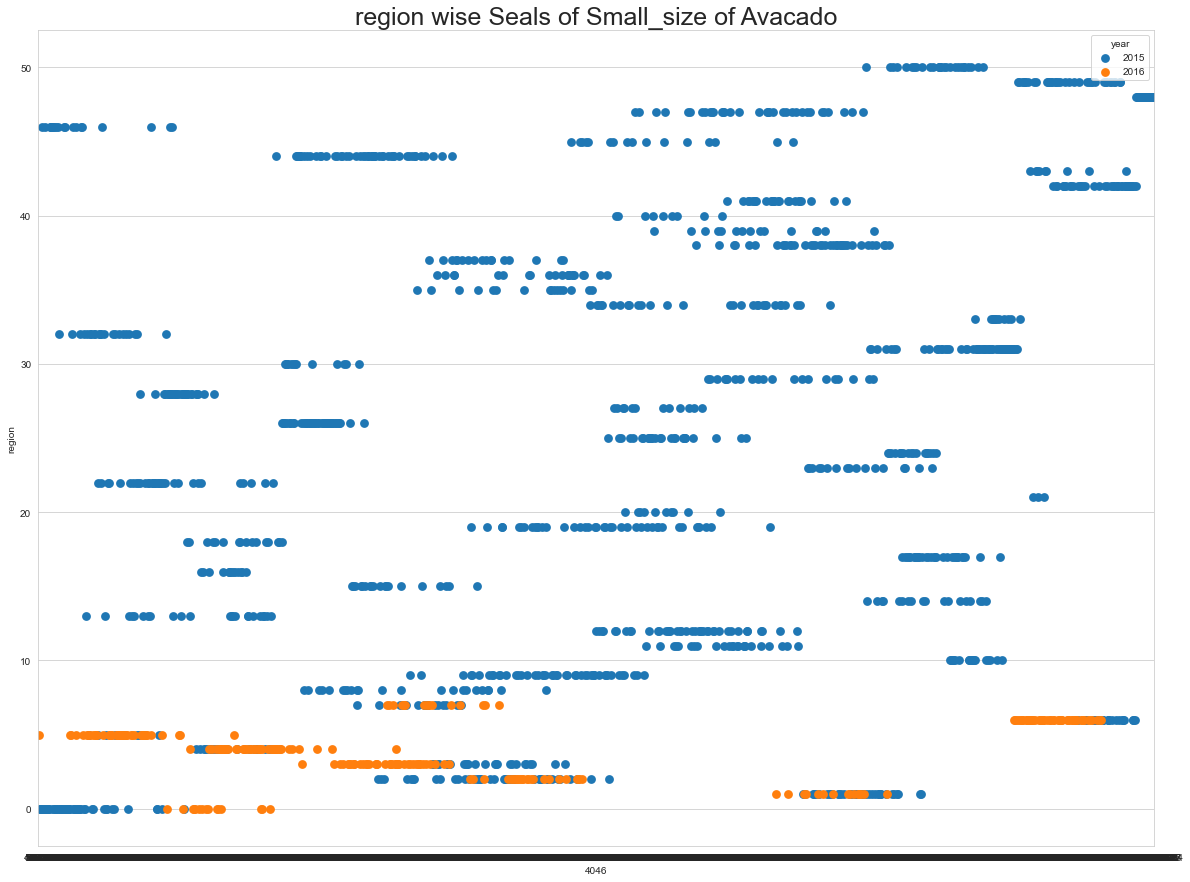

In [156]:
plt.figure(figsize=[20,15])
sns.pointplot(x='4046',y='region',data=df,hue='year', join=False)
plt.title('region wise Seals of 4046_size of Avacado',{"fontsize":25})
plt.show()


observation-- region wise Seals of 4046_size of Avacado on basic of year 

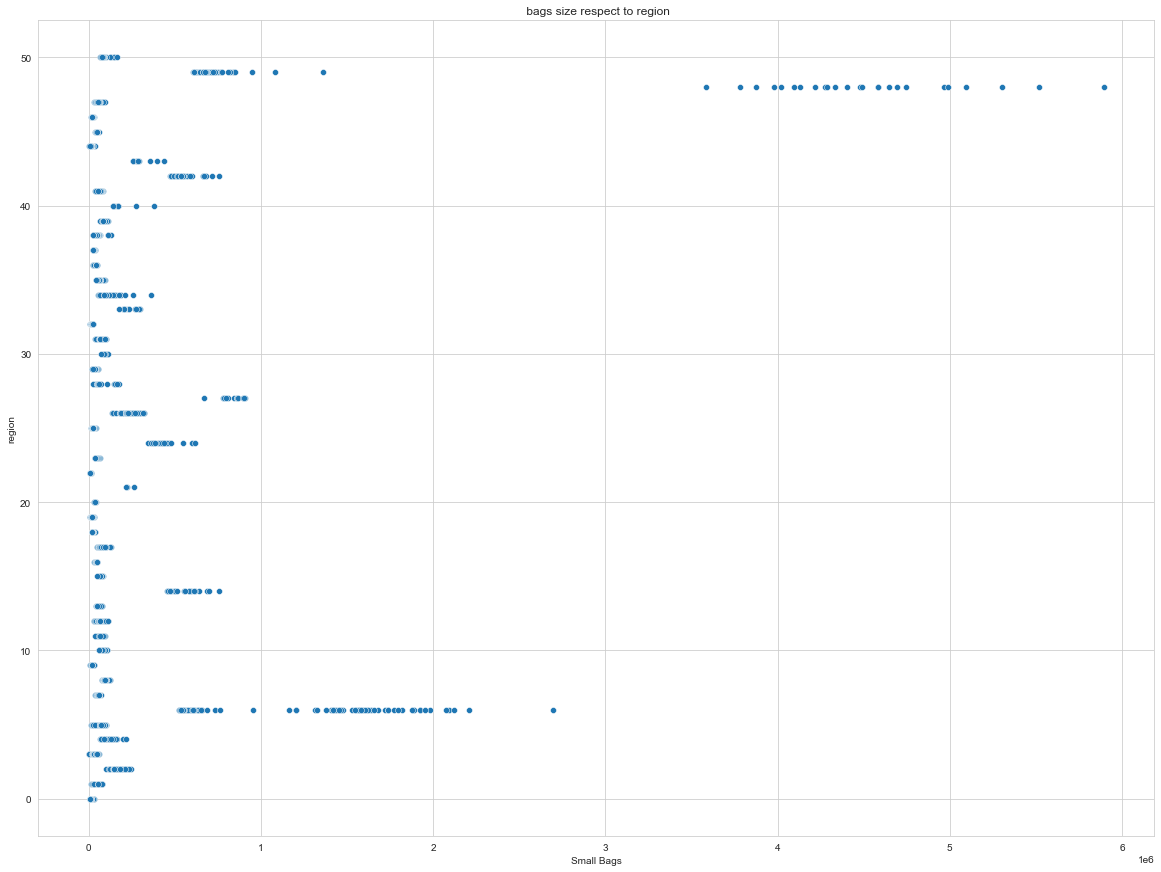

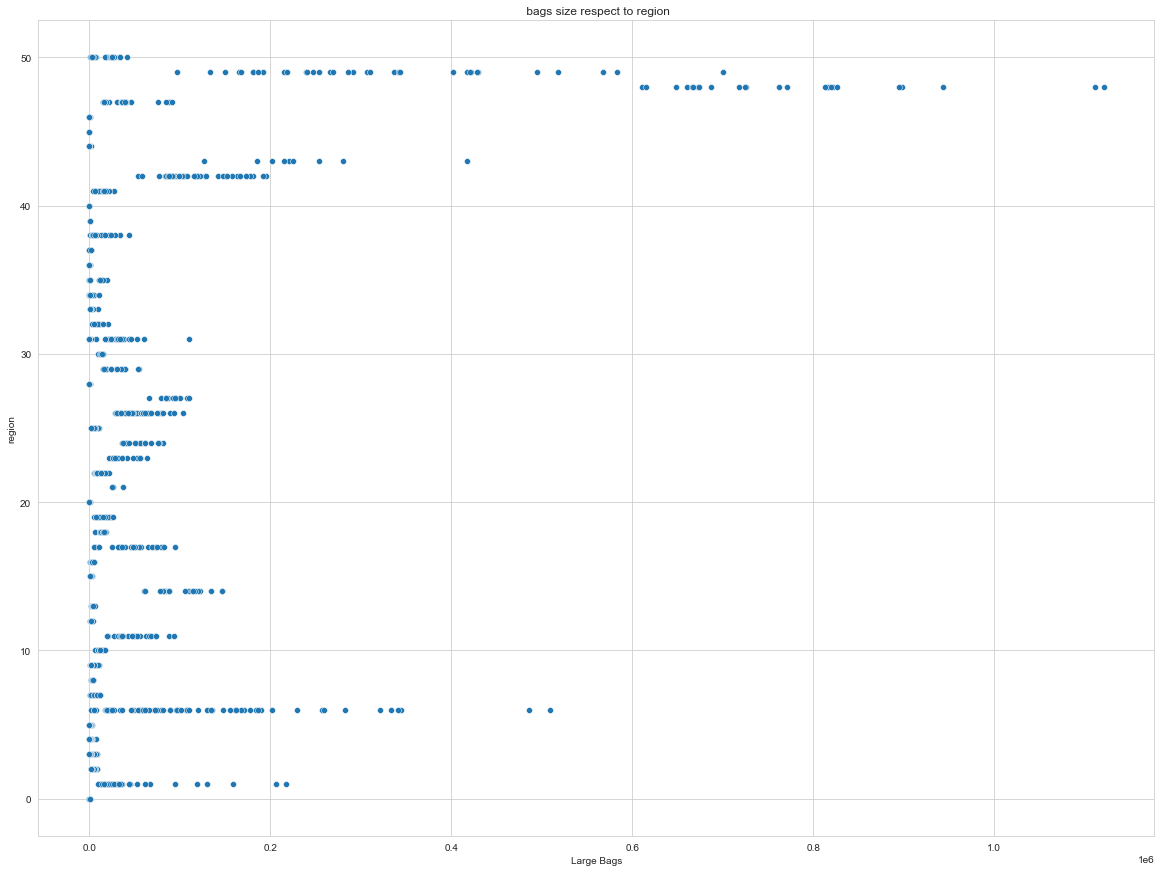

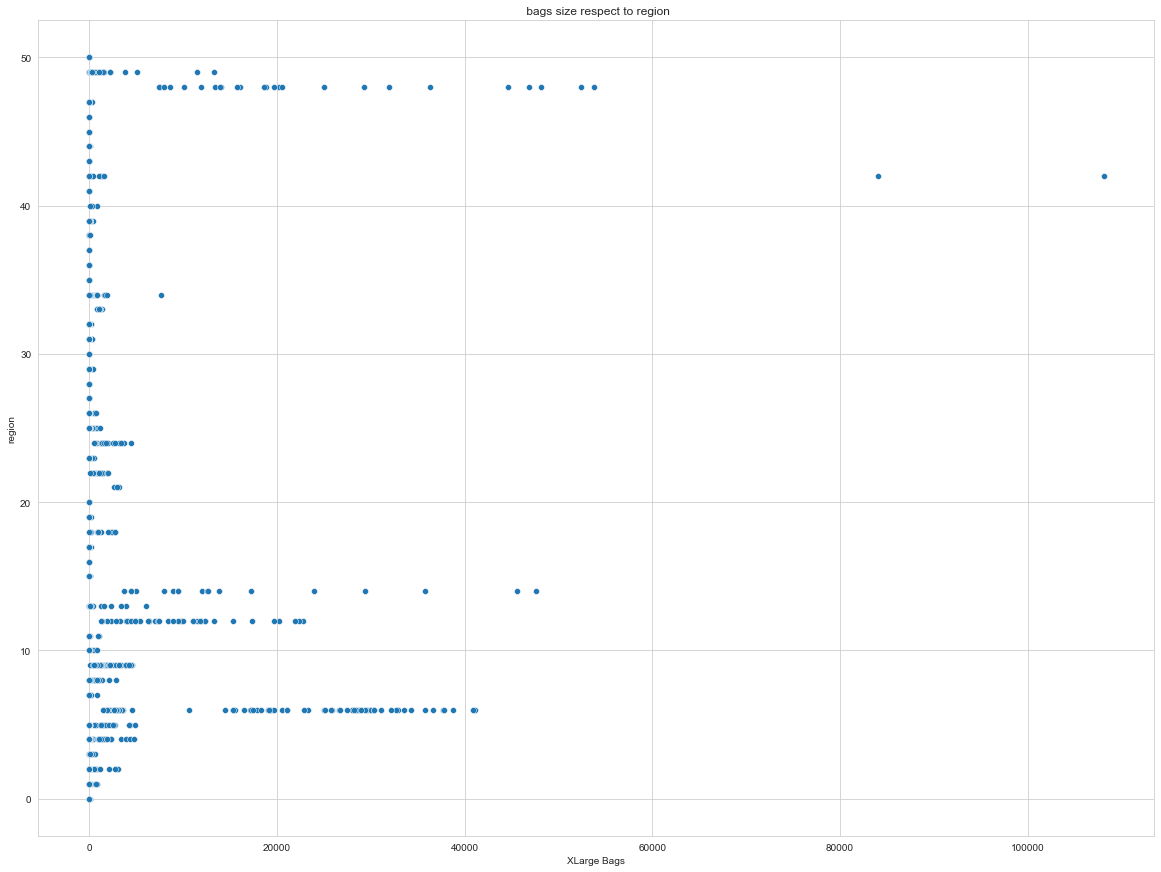

In [161]:
m=["Small Bags","Large Bags","XLarge Bags"]
for i in m:
    plt.figure(figsize=[20,15])
    sns.scatterplot(x=df[i],y="region",data=df)
    plt.title(" bags size respect to region")

Observation--Small Bags","Large Bags","XLarge Bags  bag size plot basic of region 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0,

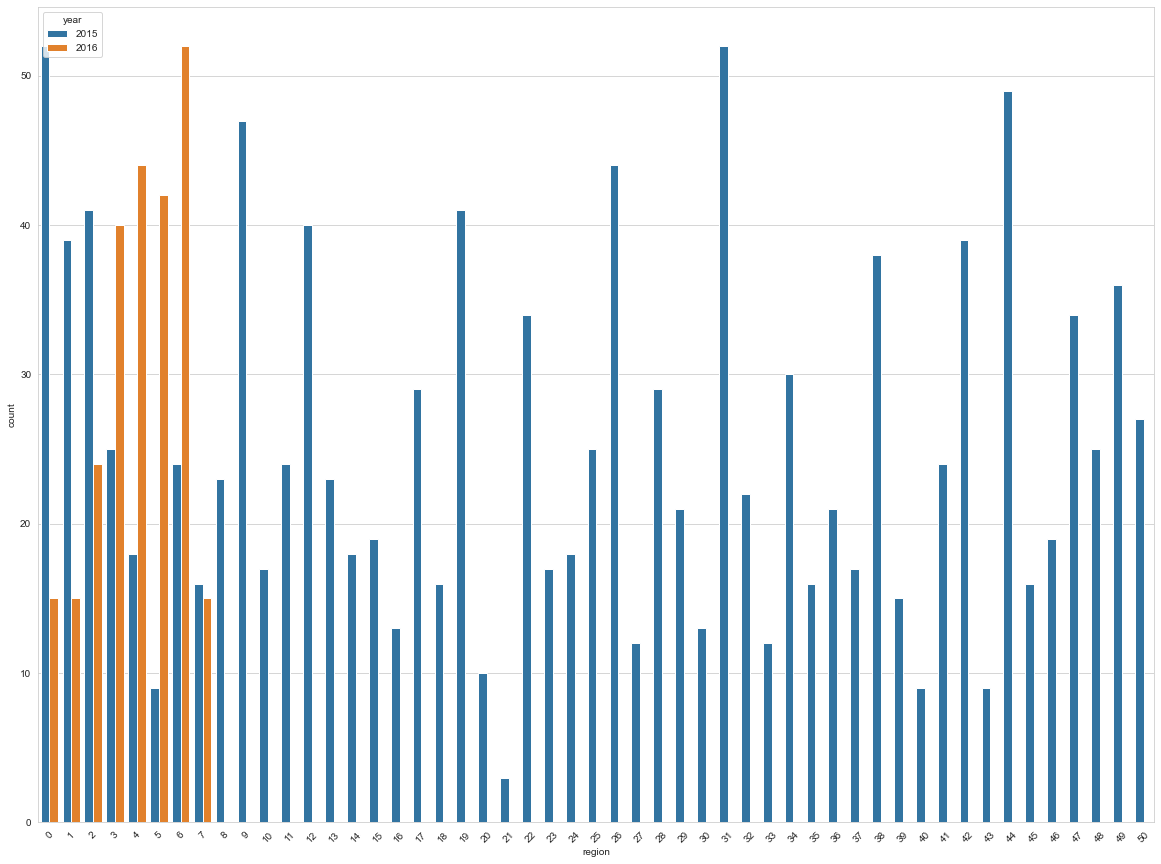

In [163]:
plt.figure(figsize=[20,15])
sns.countplot(x="region",hue="year",data=df)
plt.xticks(rotation = 45)

O → Above chart shwoing that Sales in each region respect to years

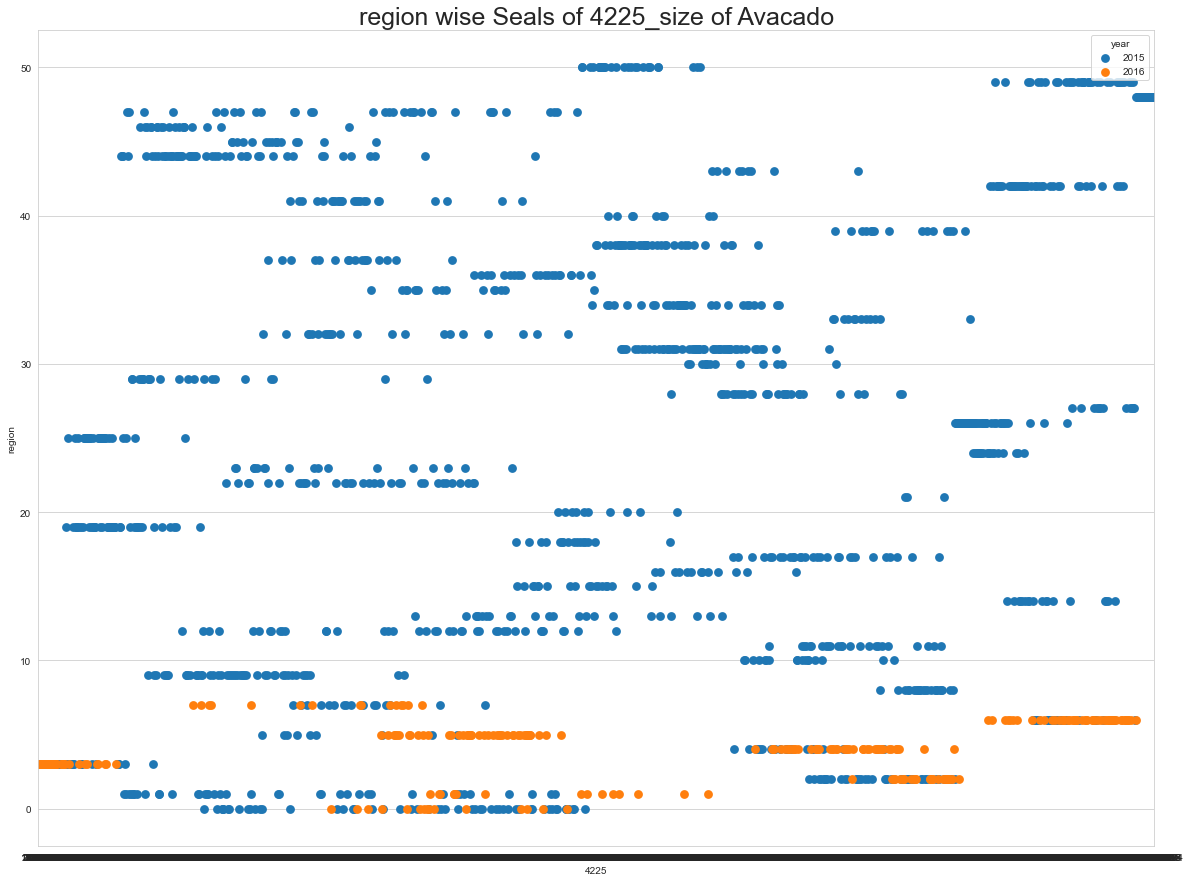

In [159]:
plt.figure(figsize=[20,15])
sns.pointplot(x="4225",y="region",data=df,hue='year', join=False)
plt.title('region wise Seals of 4225_size of Avacado',{"fontsize":25})
plt.show()

o-region wise Seals of 4225_size of Avacado

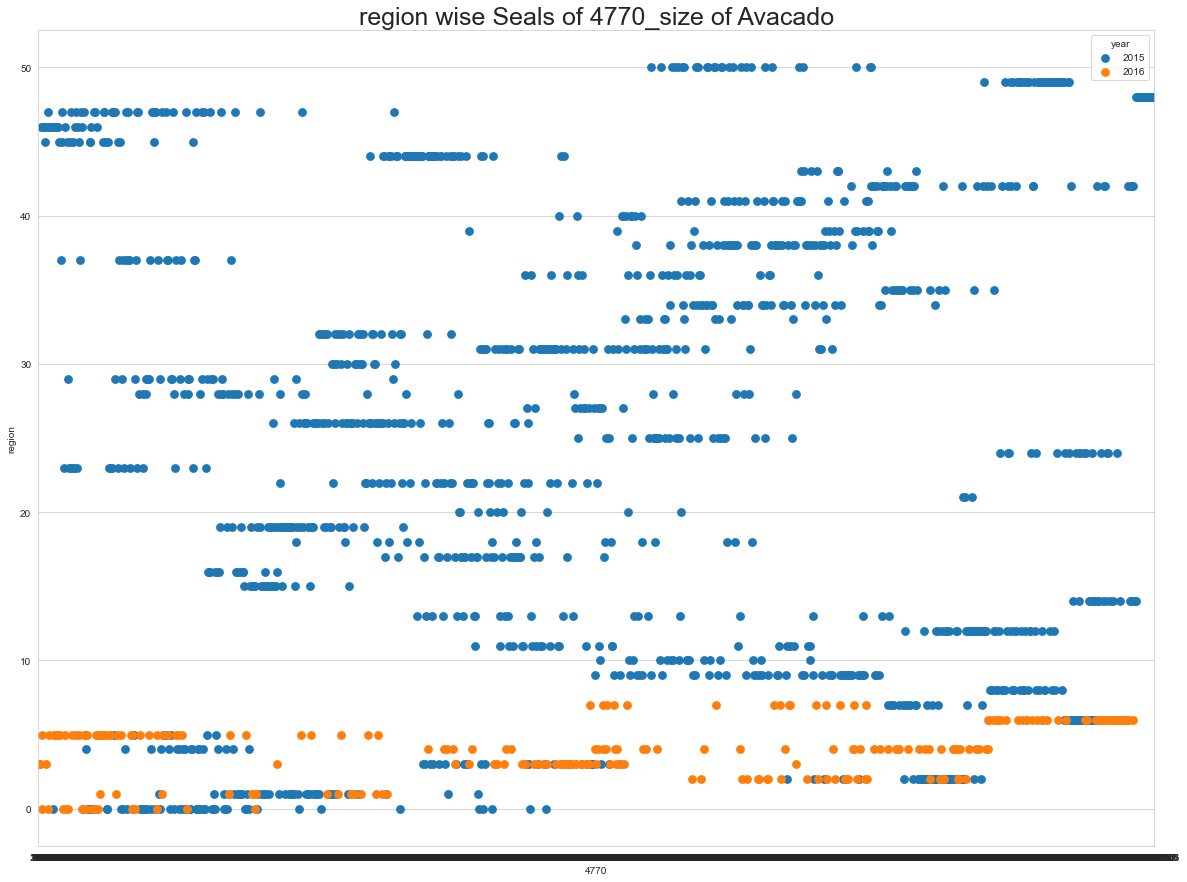

In [185]:
plt.figure(figsize=[20,15])
sns.pointplot(x="4770",y="region",data=df,hue='year', join=False)
plt.title('region wise Seals of 4770_size of Avacado',{"fontsize":25})
plt.show()

o-region wise Seals of 4770_size of Avacado

# MUltivariate analysids to see data distribution 

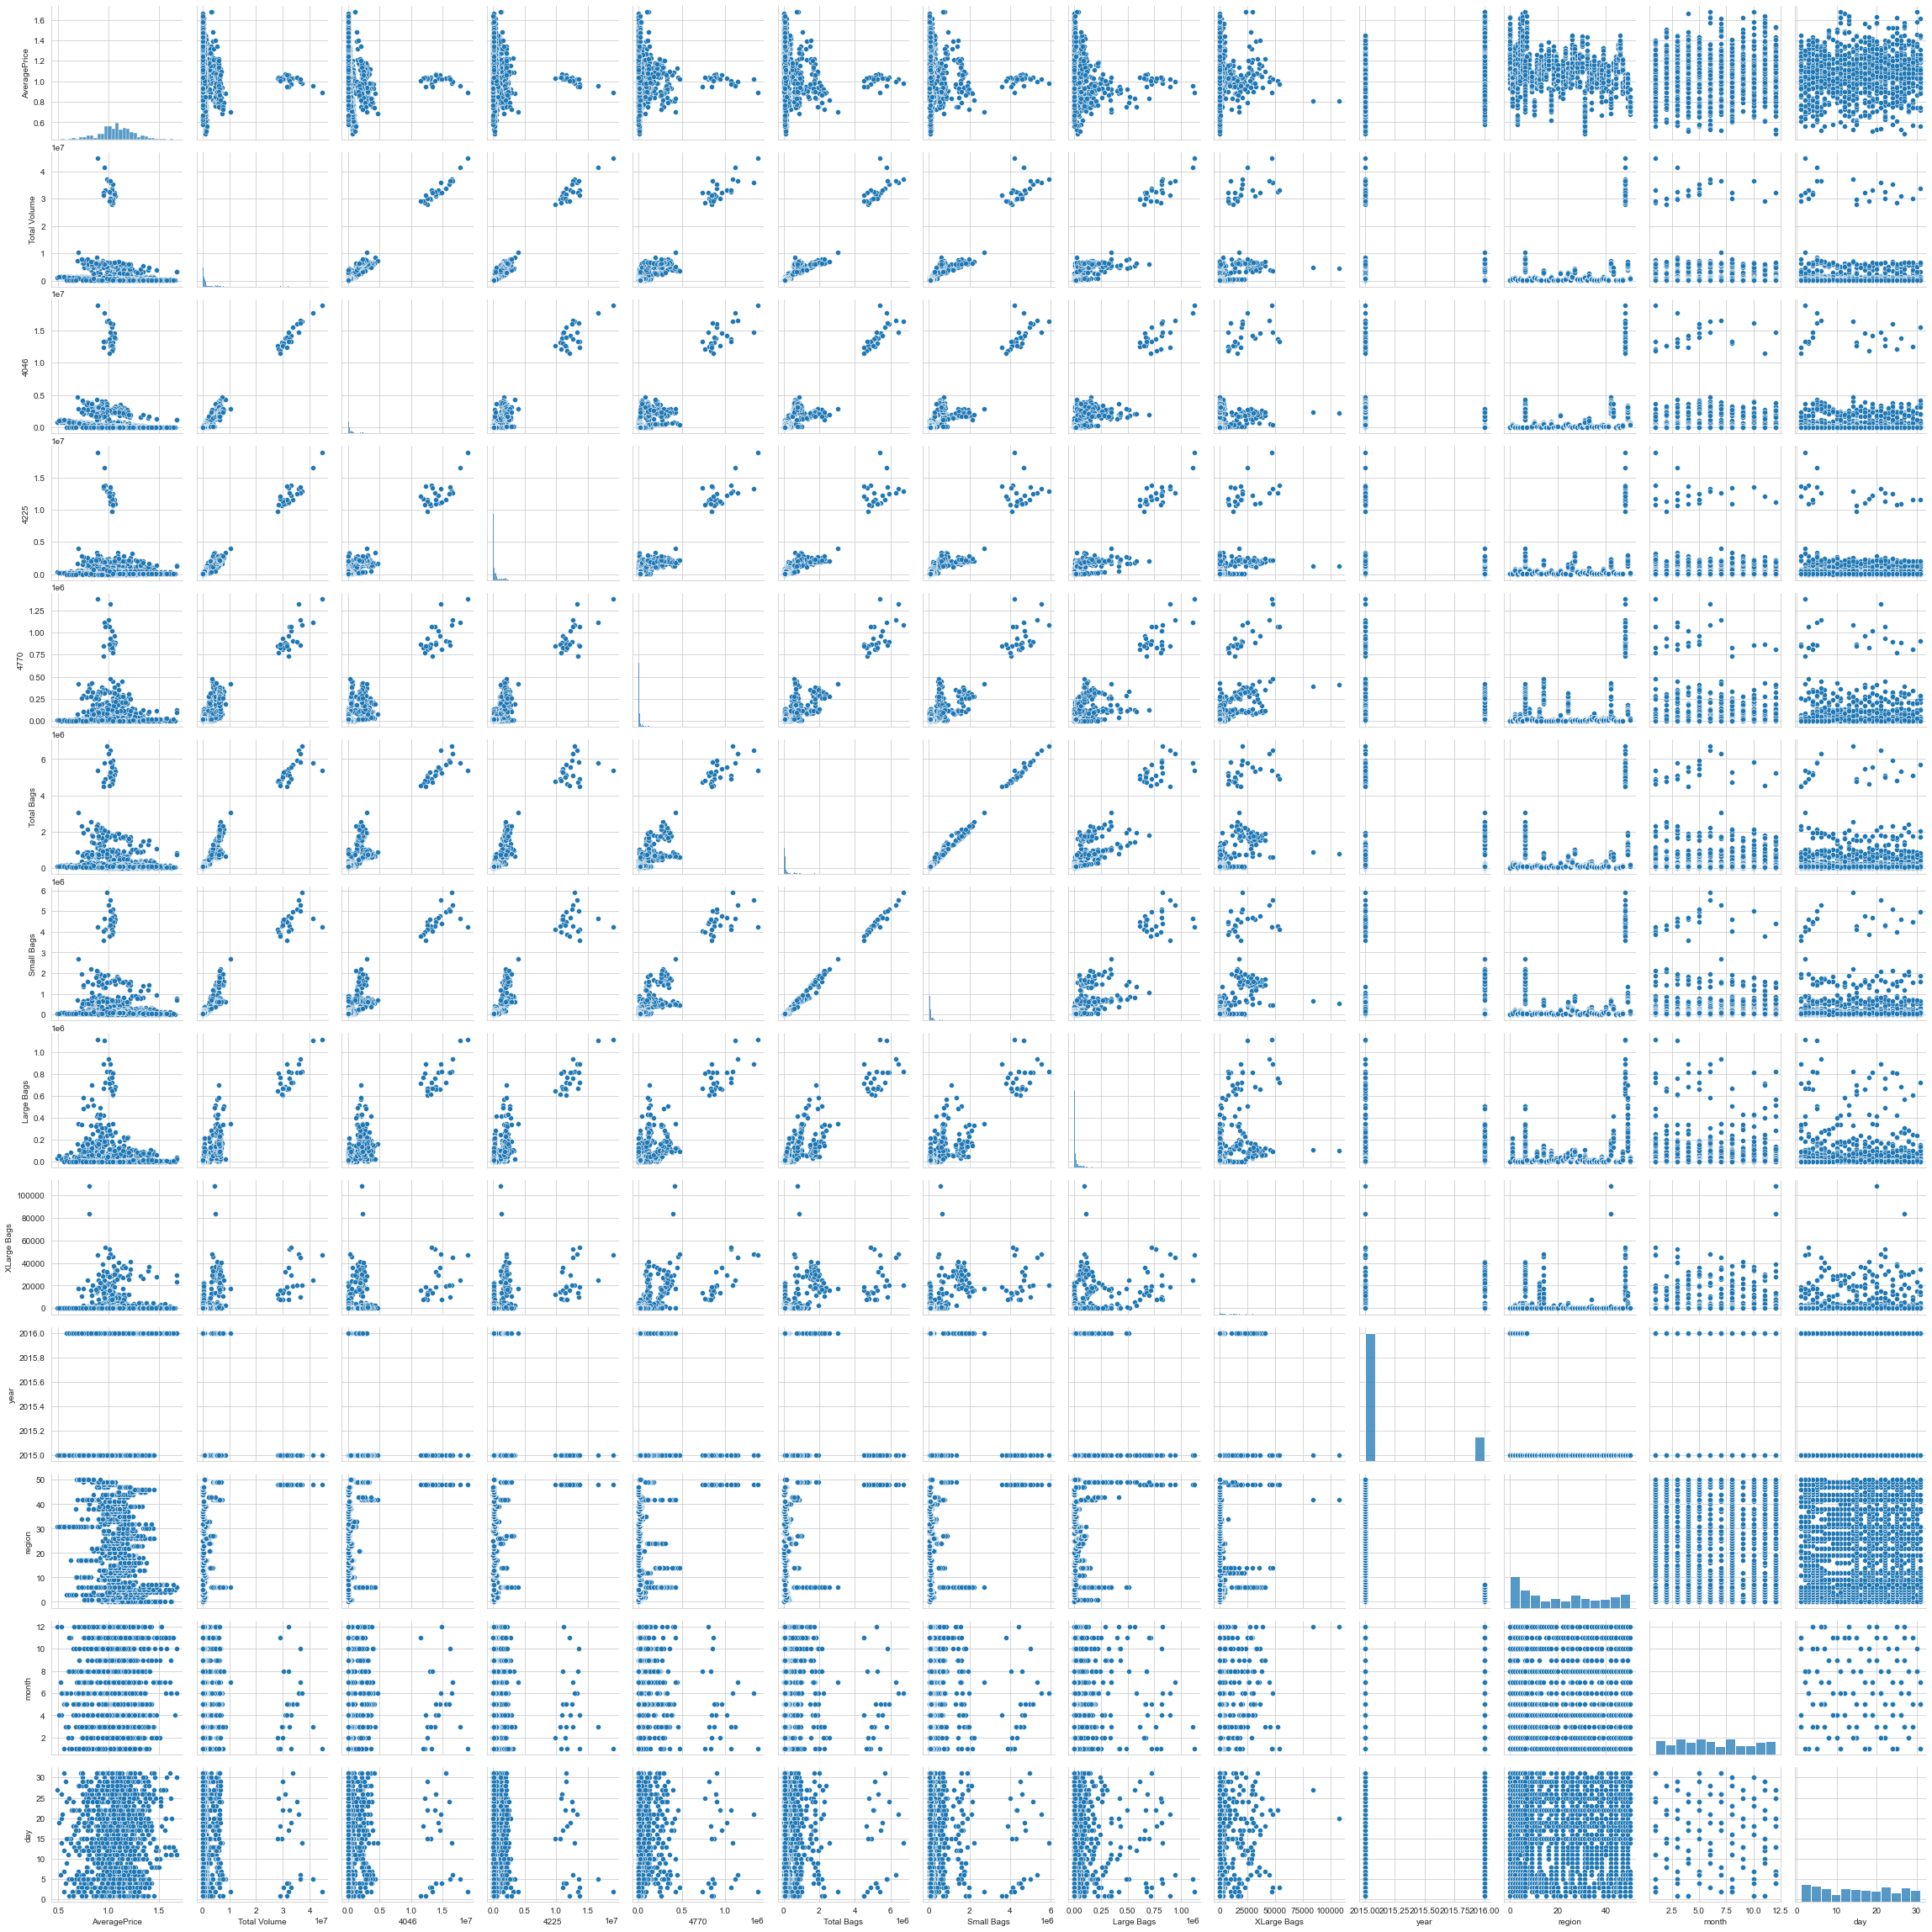

In [402]:
sns.pairplot(df)

In [313]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
month           0.101439
day             0.041303
dtype: float64

In [314]:
df1=df.drop(['AveragePrice'  ,'year','month','day','region']  , axis=1)

df1 will be my new dataset where we are dropping  target column and categorial column because we will work with df1 dataset from where we will be removing outlier and skew , hence we  should not remove skew and

In [315]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25


Skewness checking:

In [316]:
df1.skew()

Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
dtype: float64

In [223]:
df1.shape

(1517, 8)

In [317]:
from scipy.stats import  zscore
z=np.abs(zscore(df1))
z

dfnew=df1[(z<3).all(axis=1)]

In [318]:
dfnew.shape

(1439, 8)

In [319]:
dataloss=((1517-1439)/1517)*100
dataloss

5.1417270929466055

In [320]:
dfnew.skew()

Total Volume    2.699607
4046            3.117671
4225            2.364213
4770            3.329694
Total Bags      4.153979
Small Bags      4.394953
Large Bags      3.521463
XLarge Bags     5.107058
dtype: float64

In [321]:
dfnew['Total Volume']=np.log1p(dfnew['Total Volume'])

In [322]:
dfnew['Total Volume'].skew()

0.46039265140552993

In [323]:
dfnew['4046']=np.log1p(dfnew['4046'])

In [324]:
dfnew['4046'].skew()

-0.27188999203868847

In [325]:
dfnew['4225']=np.log1p(dfnew['4225'])

In [326]:
dfnew['4225'].skew()

0.010401171062906318

In [327]:
dfnew['4770']=np.log1p(dfnew['4770'])

In [328]:
dfnew['4770'].skew()

-0.45144955245821505

In [329]:
dfnew['Total Bags']=np.log1p(dfnew['Total Bags'])

In [330]:
dfnew['Total Bags'].skew()

0.37870905353688633

In [331]:
dfnew['Small Bags']=np.log1p(dfnew['Small Bags'])

In [332]:
dfnew['Large Bags']=np.log1p(dfnew['Large Bags'])

In [333]:
dfnew['XLarge Bags']=np.log1p(dfnew['XLarge Bags'])

In [334]:
dfnew['Small Bags'].skew()

0.42154798935056204

In [335]:
dfnew.skew()

Total Volume    0.460393
4046           -0.271890
4225            0.010401
4770           -0.451450
Total Bags      0.378709
Small Bags      0.421548
Large Bags     -0.981094
XLarge Bags     0.851902
dtype: float64

In [336]:
dfnew['Large Bags']=np.power(dfnew['Large Bags'],1.5)

In [337]:
dfnew.skew()

Total Volume    0.460393
4046           -0.271890
4225            0.010401
4770           -0.451450
Total Bags      0.378709
Small Bags      0.421548
Large Bags     -0.396590
XLarge Bags     0.851902
dtype: float64

In [338]:
dfnew.isnull().sum()

Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64

In [339]:
dfnew[['AveragePrice'  ,'year','month','day','region']]=df[['AveragePrice'  ,'year','month','day','region']]

In [358]:
dfnew

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,AveragePrice,year,month,day,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,9.692529,0.000000,1.33,2015,12,27,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,9.833602,0.000000,1.35,2015,12,20,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,10.013406,0.000000,0.93,2015,12,13,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,10.858221,0.000000,1.08,2015,6,12,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,12.173024,0.000000,1.28,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,28.111281,5.485958,1.39,2016,10,16,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,27.266990,0.000000,1.51,2016,9,10,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,27.085897,6.716595,1.48,2016,2,10,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,27.096848,0.000000,1.47,2016,9,25,7


# Data preprocessing

In [359]:
import  statistics as  st

from sklearn.model_selection import train_test_split

In [360]:
y=dfnew['AveragePrice']

In [361]:
x=dfnew.drop(('AveragePrice'), axis=1)

In [362]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [363]:
y=y.values.reshape(-1,1)

In [364]:
y.ndim

2

In [365]:
from  sklearn.linear_model   import LinearRegression
from sklearn.metrics  import    mean_squared_error ,r2_score

In [366]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=.22 , random_state= 2)

In [367]:
x_train.shape

(1122, 12)

In [368]:
y_train.shape

(1122, 1)

In [369]:
lg=LinearRegression()

In [370]:
lg.fit(x_train,y_train)

LinearRegression()

In [371]:
lg.score(x_train,y_train)

0.4336456584798021

In [372]:
from sklearn.linear_model   import Lasso,  LassoCV ,Ridge, RidgeCV

In [373]:
L1=LassoCV(alphas = None , cv=10 ,max_iter=10000, normalize=True)

L1.fit(x_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [374]:
alpha=L1.alpha_

alpha

3.1796391827712502e-06

In [375]:
L1.reg=Lasso(alpha)
L1.reg.fit(x_train, y_train)
L1.reg.score(x_train, y_train)

0.43364556600431503

In [376]:
alphas=np.random.uniform(low=0, high=10, size=(50,))
L2=RidgeCV(alphas=alphas, cv =10 , normalize=True)
L2.fit(x_train,y_train)



RidgeCV(alphas=array([8.12494264, 6.49294344, 2.21453766, 0.05705372, 0.08290567,
       6.66815774, 5.4421843 , 7.51975508, 8.09970536, 7.16966562,
       7.92802102, 2.73485098, 4.94817491, 0.25831108, 7.76297361,
       9.67439963, 4.08622304, 9.46252667, 1.94750091, 1.63763441,
       2.81611239, 7.95212646, 4.22158816, 5.91939409, 0.75471557,
       6.86813069, 1.22375915, 0.08472924, 1.4185299 , 3.85989514,
       5.50140653, 4.6200101 , 0.88114495, 8.40422201, 9.37779517,
       8.50674682, 0.64553062, 3.1538895 , 1.50278945, 2.59198775,
       7.92849262, 1.60172165, 8.24930998, 7.08259878, 1.51200416,
       2.47430126, 9.54005816, 6.10940659, 7.63272409, 4.36070041]),
        cv=10, normalize=True)

In [377]:
L2.alpha_

0.05705372199274916

In [378]:
L2.reg=Ridge(alpha)
L2.reg.fit(x_train, y_train)
L2.reg.score(x_train, y_train)

0.43364565847979997

In [379]:
from sklearn.tree  import DecisionTreeRegressor

from  sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from  sklearn.neighbors  import KNeighborsRegressor

In [380]:
kmn=KNeighborsRegressor()
kmn.fit(x_train,y_train)
predkmn=kmn.predict(x_test)
print("mse==",mean_squared_error(y_test,predkmn))
print("R2SCORE" ,r2_score(y_test,predkmn))

mse== 0.01163988643533123
R2SCORE 0.6556587863020041


In [381]:
rvr=RandomForestRegressor()
rvr.fit(x_train,y_train)
predrvr=rvr.predict(x_test)
print("mse==",mean_squared_error(y_test,predrvr))
print("R2SCORE" ,r2_score(y_test,predrvr))

mse== 0.008231923848580439
R2SCORE 0.7564760906527691


In [382]:
from sklearn.tree  import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtc=dtr.predict(x_test)
print("mse==",mean_squared_error(y_test,preddtc))
print("R2SCORE" ,r2_score(y_test,preddtc))

mse== 0.013279179810725553
R2SCORE 0.607163788208468


In [383]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [384]:
from xgboost  import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print("mse==",mean_squared_error(y_test,predxg))
print("R2SCORE" ,r2_score(y_test,preddtc))

mse== 0.007987251369185646
R2SCORE 0.607163788208468


In [385]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("mse==",mean_squared_error(y_test,predad))
print("R2SCORE" ,r2_score(y_test,predad))

mse== 0.01478407064313581
R2SCORE 0.5626448026845006


# Cross_val_score detection

In [386]:
from sklearn.model_selection  import cross_val_score

In [387]:
print(cross_val_score(dtr,x,y,cv=5).mean())

-0.3663187293466944


In [388]:
print(cross_val_score(rvr,x,y,cv=5).mean())

0.17663057007677926


In [389]:
print(cross_val_score(xg,x,y,cv=5).mean())

0.08376249692364579


In [390]:
print(cross_val_score(kmn,x,y,cv=5).mean())

-0.14354374472750636


# I found  RandomForestRegresso r is the best model which having minimum difference between cross_val_score and R2 score

In [391]:
from sklearn.model_selection import GridSearchCV

In [392]:
parameter= {'n_estimators':[2,4,6,8],
           'criterion':['mse', 'mae']  , 'max_depth':np.arange(2,20)}

In [393]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'n_estimators': [2, 4, 6, 8]})

In [394]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 13, 'n_estimators': 8}

Final model detection 

In [397]:
Finalmodel=RandomForestRegressor(criterion= 'mse', max_depth= 13, n_estimators = 8)
Finalmodel.fit(x_train, y_train)

pred=Finalmodel.predict(x_test)
R2score=r2_score(y_test,pred)

print(R2score*100)

70.70410349812386


In [396]:
import joblib

joblib.dump(Finalmodel,"Bestmodel for Avagado.pkl")


['Bestmodel for Avagado.pkl']